Import dependencies

In [1]:
import numpy as np
import pandas as pd
import pprint as pp
import seaborn as sns
import os
import csv
from matplotlib import pyplot as plt
from collections import defaultdict
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RepeatedKFold

Load the Data

In [2]:
reds = os.path.join("winequality-red.csv")

Clean and organize data

In [3]:
columns = defaultdict(list)
with open(reds, "r") as f:
    reader = csv.reader(f, delimiter=";")
    headers = next(reader)
    column_nums = range(len(headers))
    for row in reader:
        for i in column_nums:
            columns[headers[i]].append(row[i])
print(columns)

defaultdict(<class 'list'>, {'fixed acidity': ['7.4', '7.8', '7.8', '11.2', '7.4', '7.4', '7.9', '7.3', '7.8', '7.5', '6.7', '7.5', '5.6', '7.8', '8.9', '8.9', '8.5', '8.1', '7.4', '7.9', '8.9', '7.6', '7.9', '8.5', '6.9', '6.3', '7.6', '7.9', '7.1', '7.8', '6.7', '6.9', '8.3', '6.9', '5.2', '7.8', '7.8', '8.1', '5.7', '7.3', '7.3', '8.8', '7.5', '8.1', '6.8', '4.6', '7.7', '8.7', '6.4', '5.6', '8.8', '6.6', '6.6', '8.6', '7.6', '7.7', '10.2', '7.5', '7.8', '7.3', '8.8', '7.7', '7.5', '7', '7.2', '7.2', '7.5', '6.6', '9.3', '8', '7.7', '7.7', '7.7', '8.3', '9.7', '8.8', '8.8', '6.8', '6.7', '8.3', '6.2', '7.8', '7.4', '7.3', '6.3', '6.9', '8.6', '7.7', '9.3', '7', '7.9', '8.6', '8.6', '7.7', '5', '4.7', '6.8', '7', '7.6', '8.1', '8.3', '7.8', '8.1', '8.1', '7.2', '8.1', '7.8', '6.2', '8', '8.1', '7.8', '8.4', '8.4', '10.1', '7.8', '9.4', '8.3', '7.8', '8.8', '7', '7.3', '8.8', '7.3', '8', '7.8', '9', '8.2', '8.1', '8', '6.1', '8', '5.6', '5.6', '6.6', '7.9', '8.4', '8.3', '7.2', '7.8',

Convert data into dataframe and view

In [4]:
wine = pd.DataFrame(columns)
wine
#The information below there are 1599 wines and 12 different features

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
4,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.6,0.08,2,0.09,32,44,0.9949,3.45,0.58,10.5,5
1595,5.9,0.55,0.1,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
1596,6.3,0.51,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11,6
1597,5.9,0.645,0.12,2,0.075,32,44,0.99547,3.57,0.71,10.2,5


In [5]:
#Check the formate of the data
wine.dtypes

fixed acidity           object
volatile acidity        object
citric acid             object
residual sugar          object
chlorides               object
free sulfur dioxide     object
total sulfur dioxide    object
density                 object
pH                      object
sulphates               object
alcohol                 object
quality                 object
dtype: object

In [6]:
#Change the data from objects to float64
wine["fixed acidity"] = wine["fixed acidity"].replace(',', '').astype(float)
wine["volatile acidity"] = wine["volatile acidity"].replace(',', '').astype(float)
wine["citric acid"] = wine["citric acid"].replace(',', '').astype(float)
wine["residual sugar"] = wine["residual sugar"].replace(',', '').astype(float)
wine["chlorides"] = wine["chlorides"].replace(',', '').astype(float)
wine["free sulfur dioxide"] = wine["free sulfur dioxide"].replace(',', '').astype(float)
wine["total sulfur dioxide"] = wine["total sulfur dioxide"].replace(',', '').astype(float)
wine["density"] = wine["density"].replace(',', '').astype(float)
wine["pH"] = wine["pH"].replace(',', '').astype(float)
wine["sulphates"] = wine["sulphates"].replace(',', '').astype(float)
wine["alcohol"] = wine["alcohol"].replace(',', '').astype(float)
wine["quality"] = wine["quality"].replace(',', '').astype(int)

In [7]:
#Check the formate of the data
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int32
dtype: object

In [8]:
#View the statistical description of data
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


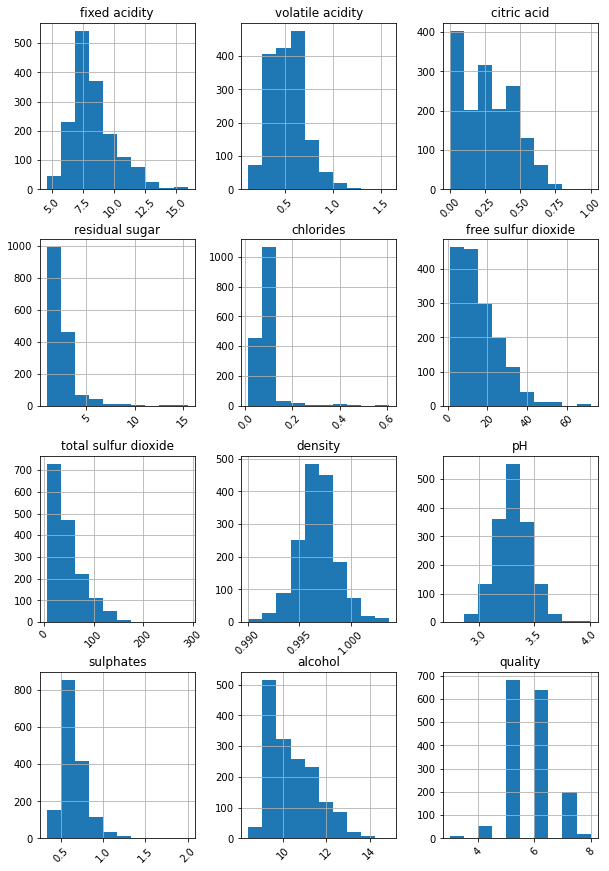

In [9]:
#View each distribution of each feature
wine.hist(figsize=(10,15), xrot=45)
plt.show()

<AxesSubplot:xlabel='quality', ylabel='count'>

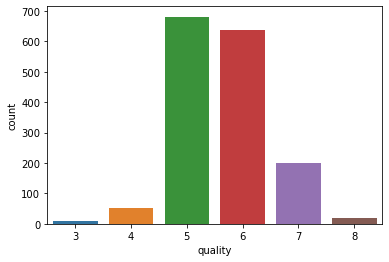

In [10]:
#Count of quality wine
sns.countplot(x="quality", data=wine)

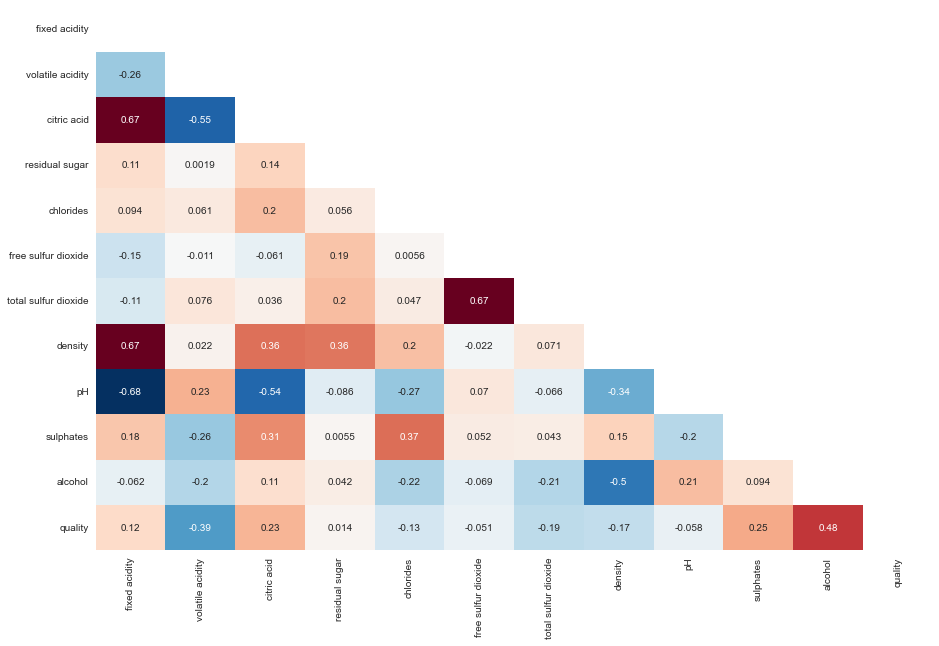

In [11]:
#Correlation between features
corr = wine.corr()
sns.set_style("whitegrid")
plt.figure(figsize=(15,10))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(corr, cmap="RdBu_r", annot=True, cbar=False, mask=mask)
plt.show()

Outliers of quality related to other wine features

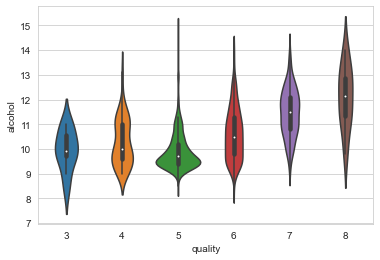

In [12]:
#Quality with alcohol
sns.violinplot(x="quality", y="alcohol", data=wine)
plt.show()

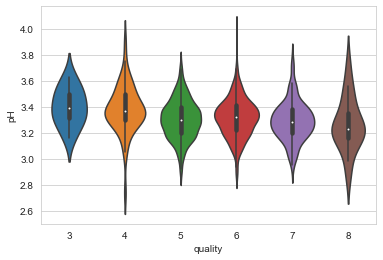

In [13]:
#Quality with pH
sns.violinplot(x="quality", y="pH", data=wine)
plt.show()

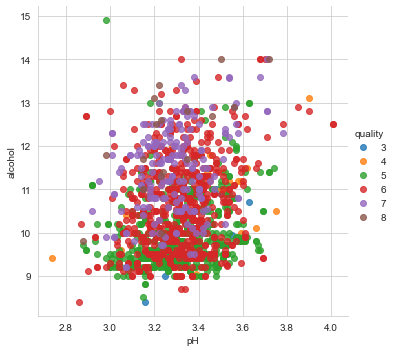

In [14]:
#Relation of pH, alcohol, and quality
sns.lmplot(x="pH", y="alcohol", hue="quality", fit_reg=False, data=wine)
plt.show()

Define variables and split dataset into train and test

In [15]:
X = wine.drop('quality', axis=1)
y = wine.quality
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.2)
print(len(X_train), len(X_test), len(y_train), len(y_test))

1279 320 1279 320


Run model for scores-code as taught in the book

In [16]:
#Linear regression score
lr = LinearRegression().fit(X_train, y_train)
print("Training set:{:.2f}".format(lr.score(X_train, y_train)))
print("Test set:{:.2f}".format(lr.score(X_test, y_test)))

Training set:0.35
Test set:0.37


In [17]:
#Ridge regression score
ridge = Ridge().fit(X_train, y_train)
print("Training set:{:.2f}".format(ridge.score(X_train, y_train)))
print("Test set:{:.2f}".format(ridge.score(X_test, y_test)))

Training set:0.35
Test set:0.37


In [18]:
#Ridge regression with alpha equal to 10
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set:{:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set:{:.2f}".format(ridge10.score(X_test, y_test)))

Training set:0.34
Test set:0.37


In [19]:
#Ridge regression with alpha equal to 0.1
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set:{:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set:{:.2f}".format(ridge01.score(X_test, y_test)))

Training set:0.35
Test set:0.37


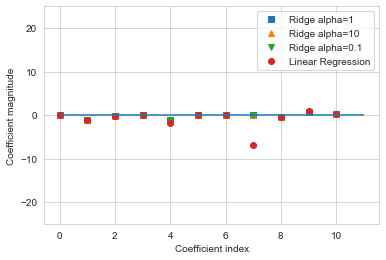

In [20]:
#Visualization of the previous regression scores
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge.coef_, '^', label='Ridge alpha=10')
plt.plot(ridge.coef_, 'v', label='Ridge alpha=0.1')
plt.plot(lr.coef_, 'o', label='Linear Regression')
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

In [21]:
#Fit and train a different Ridge regression model
def fit_and_evaluate_default(model, name):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print('------------- {} default -------------'.format(name))
    print('R^2 score - ', r2_score(y_test, pred))
    print('MSE score - ', mean_squared_error(y_test, pred))
    print('MAE score - ', mean_absolute_error(y_test, pred))
fit_and_evaluate_default(Ridge(random_state=123), 'Ridge')

------------- Ridge default -------------
R^2 score -  0.36941019565093103
MSE score -  0.45321178946166096
MAE score -  0.5302739114324462


In [22]:
#Create a pipline
pipeline = {'ridge': make_pipeline(StandardScaler(), Ridge(random_state=123))}
ridge_hyperparameters = {
     'ridge__alpha' : [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 
                       1, 5, 10, 50, 100, 500, 1000]}
hyperparameters = {'ridge': ridge_hyperparameters}

In [23]:
#Fit model with previouse changes and predict score
fitted_models = {}
for name, pip in pipeline.items():
    model = GridSearchCV(pip, hyperparameters[name], cv=10, n_jobs=-1)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print('-------------- {} HyperParameters --------------'.format(name))
    fitted_models[name] = model
    print('R^2 Score - ', r2_score(y_test, pred))
    print('MSE Score - ', mean_squared_error(y_test, pred))
    print('MAE Score - ', mean_absolute_error(y_test, pred))

-------------- ridge HyperParameters --------------
R^2 Score -  0.37037387051233417
MSE Score -  0.45251918579857675
MAE Score -  0.530653844923914


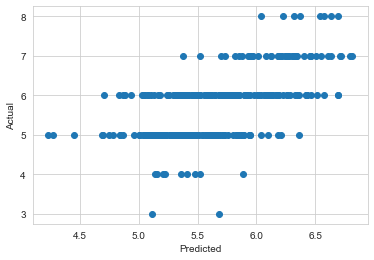

In [24]:
#Graph prediction
pred = fitted_models['ridge'].predict(X_test)
plt.scatter(pred, y_test)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [25]:
#Fit training data to new model
model = ridge.fit(X_train, y_train)

In [26]:
#Set y variable for predict test score
y_pred = ridge.predict(X_test)
y_pred[0:10]

array([5.65369596, 5.20962675, 5.65886076, 5.66688722, 5.358043  ,
       6.30762996, 6.14111396, 5.74189253, 5.2625092 , 4.94975964])

In [27]:
#Calculate Slope
print("Slope: %.2f" % ridge.coef_[0])

Slope: 0.02


In [28]:
#Calculate Intercept
print("Intercept: %.2f" % ridge.intercept_)

Intercept: 4.12


In [29]:
mean_squared_error(y_test, y_pred)

0.45321178946166096

In [30]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.6732100633989817

In [31]:
#Ridge prediction score squared
print("Rsquared: %.2f" % ridge.score(X_test, y_test))

Rsquared: 0.37


In [32]:
# import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [33]:
# load dataset and join path
wine = os.path.join("red wine quality data.csv")
red = pd.read_csv(wine)

In [34]:
# gain info about dataset
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [35]:
# see first five rows of dataset
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [36]:
# find out specific info about the data
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<AxesSubplot:xlabel='quality', ylabel='sulphates'>

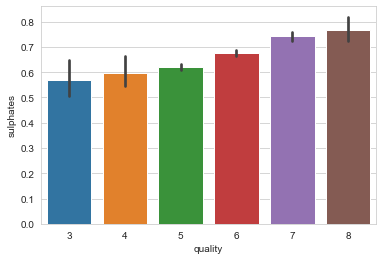

In [37]:
#quality vs sulphates
sns.barplot(x='quality', y='sulphates',data=red)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

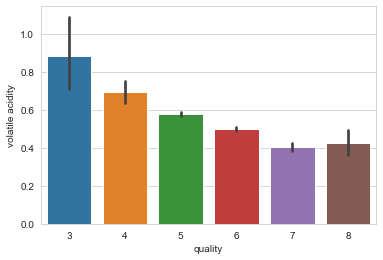

In [38]:
#quality vs volatile acidity
sns.barplot(x = 'quality', y='volatile acidity', data = red)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

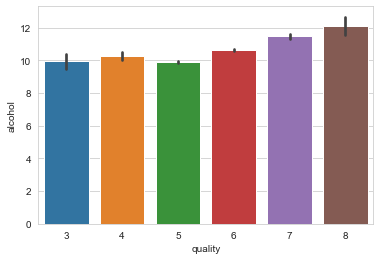

In [39]:
#quality vs alcohol
sns.barplot(x = 'quality', y='alcohol', data = red)

In [40]:
#showing counts before categorize quality column
red['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [41]:
#categorize wine quality
bins = (2,6.5,8)
group_names = ['bad','good']
categories = pd.cut(red['quality'], bins, labels = group_names)
red['quality'] = categories

In [42]:
#after categorize
red['quality'].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

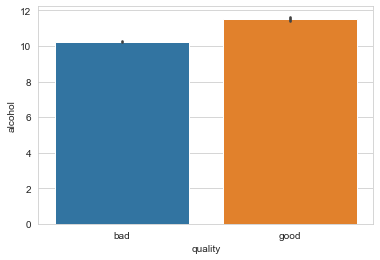

In [43]:
#barplot of quality vs alcohol.
# more alcohol, better red wine
sns.barplot(x='quality', y='alcohol',data=red)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

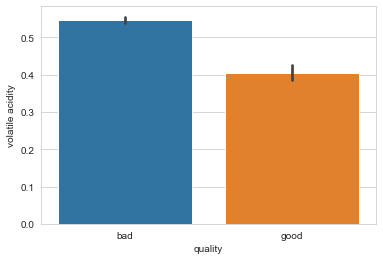

In [44]:
#barplot of quality vs volatile acidity
#less volatile acidity, better red wine.
sns.barplot(x='quality', y='volatile acidity',data=red)

In [45]:
#splitting data to X ve y
X = red.drop(['quality'], axis = 1)
y = red['quality']

In [46]:
# Encoding our dependent variable:Quality column
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
y

array([0, 0, 0, ..., 0, 0, 0])

In [47]:
# Splitting the dataset into the Training set and Test set.%20 of dataset for test set,%80 for training set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [48]:
# Feature Scaling to X_train and X_test to classify better.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [49]:
#I'll use Kernel SVM model to classify.
# Fitting Kernel SVM to the Training set
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
#Predicting the Test Set
y_pred = classifier.predict(X_test)

<AxesSubplot:>

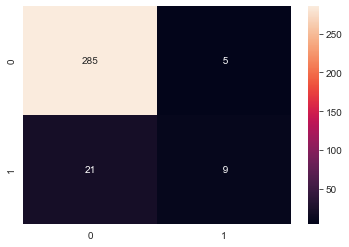

In [50]:
#making confusing matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='2.0f')

In [51]:
#k-Fold cross validation for improving our model
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train,
                             y = y_train, cv = 10)
#we can see model's average accuracy
accuracies.mean()

0.8772391732283464

In [52]:
#here is the model's standart deviation
accuracies.std()

0.024514842956813693

In [53]:
#Grid search for best model and parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'],
               'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
#here is the best accuracy
best_accuracy

0.8944635826771654

In [54]:
#and here is best parameters
best_parameters

{'C': 1, 'gamma': 0.9, 'kernel': 'rbf'}

In [55]:
# Fitting Kernel SVM to the Training set with best parameters
classifier = SVC(kernel = 'rbf', probability=True, random_state = 0, gamma = 0.9)
classifier.fit(X_train, y_train)

#Predicting the Test Set
model = classifier.predict(X_test)
model

#Prediction Probability
pred = classifier.predict_proba(X_test)
pred

array([[0.89012933, 0.10987067],
       [0.9363734 , 0.0636266 ],
       [0.01224349, 0.98775651],
       [0.93381079, 0.06618921],
       [0.94272347, 0.05727653],
       [0.94273216, 0.05726784],
       [0.94596341, 0.05403659],
       [0.94272071, 0.05727929],
       [0.93121687, 0.06878313],
       [0.94374773, 0.05625227],
       [0.94936465, 0.05063535],
       [0.94273007, 0.05726993],
       [0.94270247, 0.05729753],
       [0.88962448, 0.11037552],
       [0.92519117, 0.07480883],
       [0.62179453, 0.37820547],
       [0.01223518, 0.98776482],
       [0.92397337, 0.07602663],
       [0.94675418, 0.05324582],
       [0.92573824, 0.07426176],
       [0.88479913, 0.11520087],
       [0.89283318, 0.10716682],
       [0.94280626, 0.05719374],
       [0.88526258, 0.11473742],
       [0.94236452, 0.05763548],
       [0.93872466, 0.06127534],
       [0.93751071, 0.06248929],
       [0.04409252, 0.95590748],
       [0.93816125, 0.06183875],
       [0.87588331, 0.12411669],
       [0.

<AxesSubplot:>

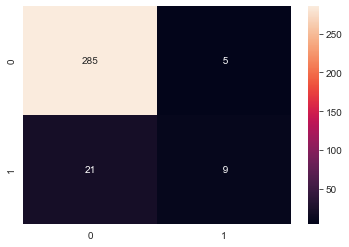

In [56]:
#making confusing matrix again
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='2.0f')